In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from scipy.cluster.hierarchy import cophenet 
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings('ignore')

In [3]:
Datos =  pd.read_csv('./Mall_Customers.csv') 

In [4]:
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2. Proprocesar los datos limpiandolos.tratando valores faltantes y transformandolos segun sea necesario

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

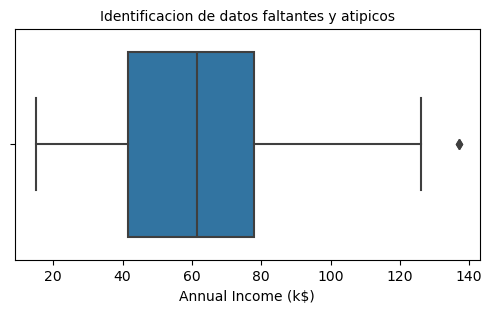

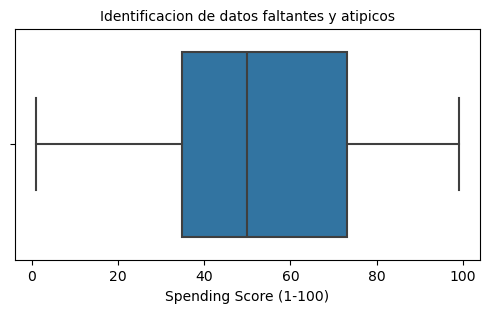

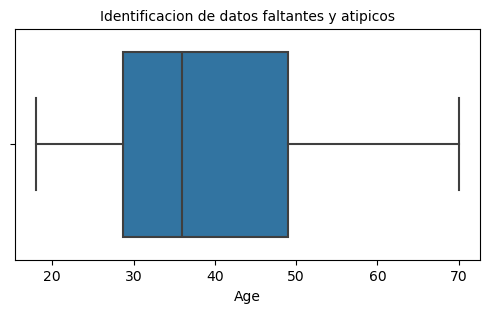

In [6]:
plt.figure(figsize=(6,3)) 
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)


In [7]:
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Spending Score (1-100)'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0


NO SE PRESENTAN DATOS ATIPICOS

3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando selección de caracteristicas
Variables de interes:
* Annual Income
* Spending Score

In [34]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(Datos), columns=Datos.columns) 
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,0.886405,-0.276302,2.268791,1.118061
196,1.671450,0.886405,0.441365,2.497807,-0.861839
197,1.688771,-1.128152,-0.491602,2.497807,0.923953
198,1.706091,-1.128152,-0.491602,2.917671,-1.250054


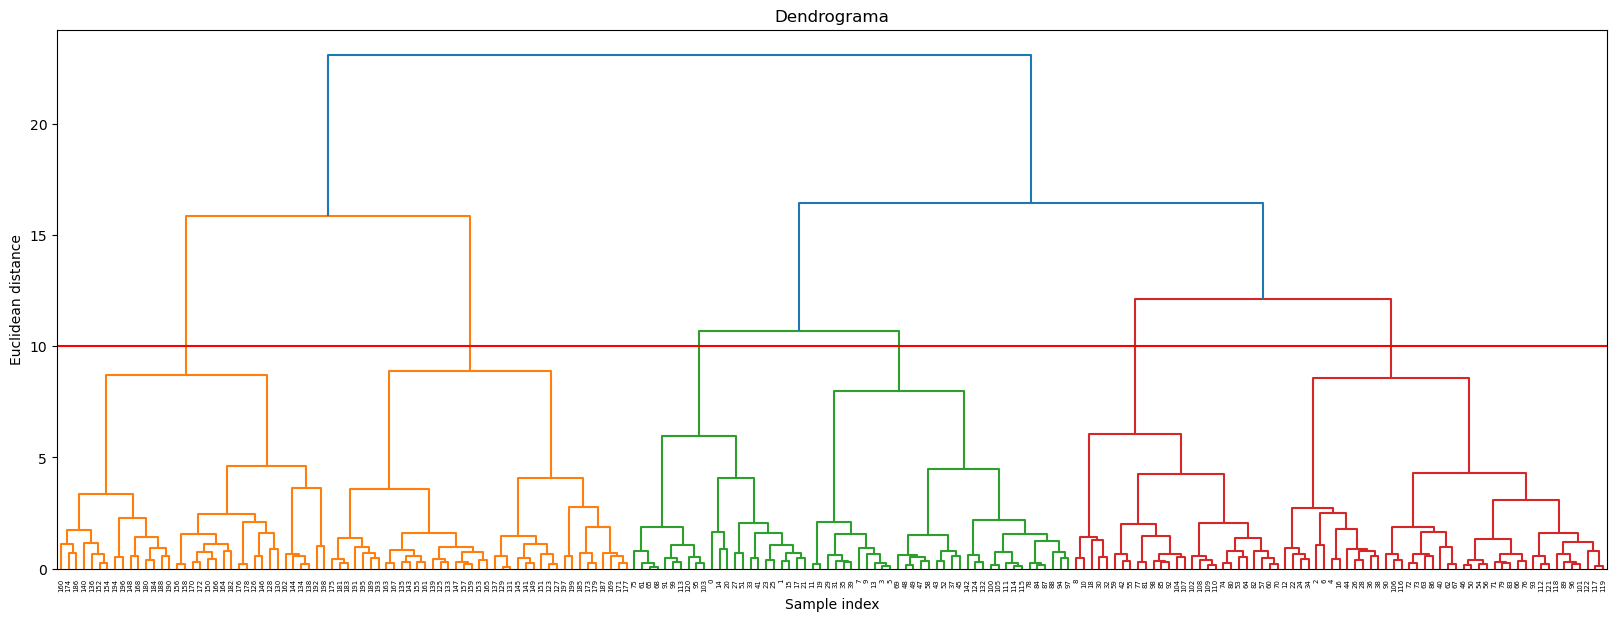

In [35]:
ward_clustering = linkage(x, method = "ward", metric="euclidean")  
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')  
plt.title('Dendrograma')
plt.xlabel('Sample index') 
plt.ylabel('Euclidean distance')
plt.show()

In [36]:
hier_clustering = AgglomerativeClustering(n_clusters = 6) 
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([5, 5, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 5, 5, 2, 5, 4, 3, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 4, 3, 4, 5, 2, 3, 2, 3, 2, 3, 2, 5, 4, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 4, 2, 4, 2, 4, 3, 4, 4, 5, 2, 2, 4, 5,
       2, 2, 5, 3, 4, 2, 2, 2, 4, 5, 2, 4, 3, 2, 4, 4, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 5, 4, 2, 3, 5, 2, 3, 4, 5, 3, 2, 4, 5, 4, 3, 2, 4, 4, 4,
       4, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [42]:
labels = labels_hier
colores=['red','green','cyan','yellow','blue','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])

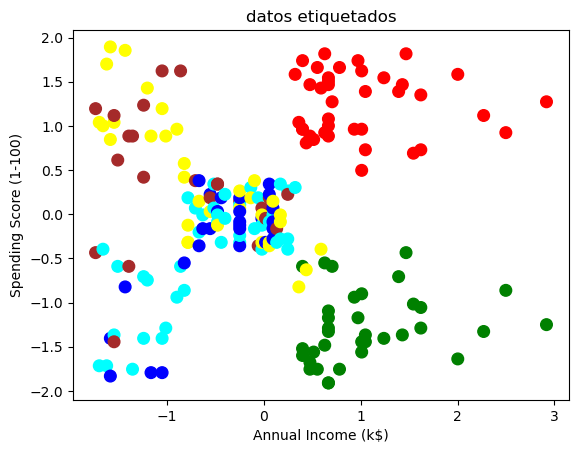

In [45]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [46]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

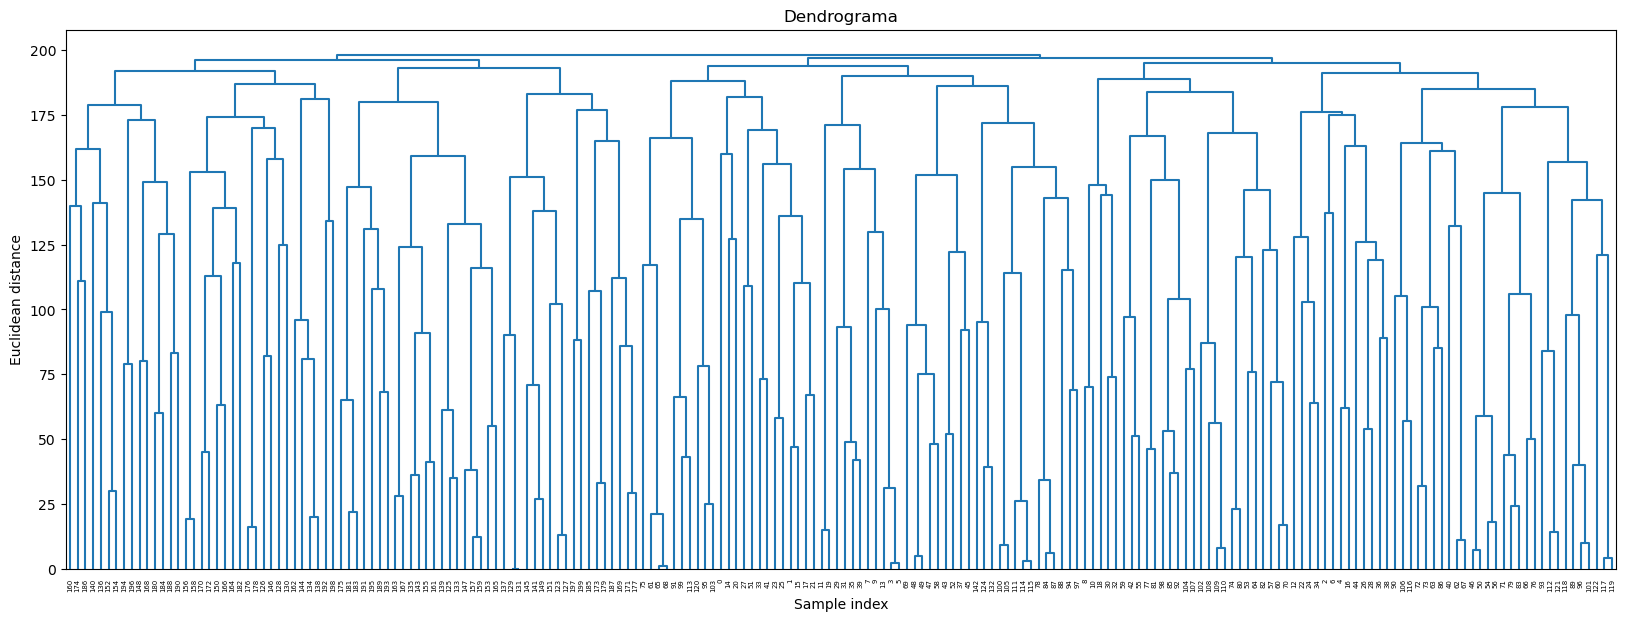

In [18]:
plot_dendrogram(hier_clustering, color_threshold=0)

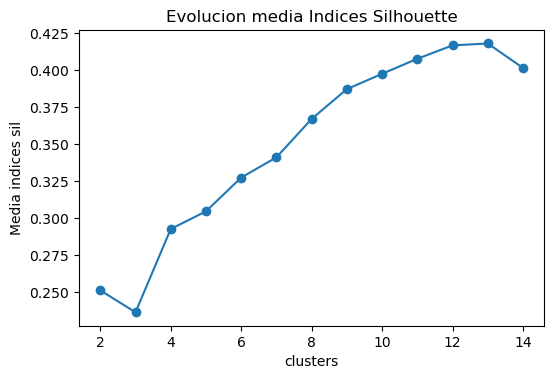

In [47]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion media Indices Silhouette")
ax.set_xlabel('clusters')
ax.set_ylabel('Media indices sil');

In [48]:
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Coeficiente de Silhoutte:", metrics.silhouette_score(x, labels_hier))
print("Indice de Calinski Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Indice Davies Bouldin:", metrics.davies_bouldin_score(x, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Coeficiente de Silhoutte: 0.3273267369164873
Indice de Calinski Harabasz: 74.28233987716496
Indice Davies Bouldin: 1.1440948835825624


In [49]:
x_dist = pdist(x)
Z = linkage(x, 'ward')
coef_cofenetico = cophenet(Z, x_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6135110636355512, array([ 4.05770035, 16.44353185, 10.65959642, ..., 15.84831745,
        0.56583001, 15.84831745]))



Interpretacion de resultados 

Del desempeño del modelo se puede describir: 

* Coeficiente de Silhoutte : El coeficiente es de 0.45 lo que indica que hay una buena cantidad de separacion entre los grupos. Los grupos son algo distintos pero se encuentran superposiciones entre ellos. 

* Indice de Calinski - Harabasz : El indice resultante es 166.72 lo que indica que los cluster no estan bien definidos. 

* Indice Davies Bouldin: Un alto valor en este indice, indica que hay una superposicion entre algunos cluster, lo que significa que algunso cluster son similares y no hay mucha separacion entre los grupos. 